<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/An%C3%A1lise_de_componente_Principal_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conceitos**

PCA - captura quais são os principais componentes presentes em um conjunto de dados, aqueles que possam ter maior relevância ou mais importância para serem analisados. É aplicável a variáveis numéricas (quantitativas). É usado o PCA quando é necessário reduzir o custo cumputacional de processamento (custo de tempo/financeiro).

O PCA trata o tamanho na horizontal, além do dessa técnica existe outras como a Redução de Dimensionalidade, onde se tem muitas colunas ou variáveis (dimensões) e depois de aplicar a técnica vamos ter um número reduzido de dimensões, mas sem perde significância.

Como método de aprendizagem supervisionado, pode ser aplicado:
* Redução de dimensionalidade.
* Redução de ruído dos dados. (Ruídos - separa o que é informação relevante do que não é)

Como aplicação direta:
* Análise exploratório, para descobrir componentes principais de conjuntos de dados e trazer insights sobre os dados.
* Mitigação do overfit de algoritmos de ML.
* Simplificação de tomada de decisão.

**Premissas para utilização do método**

Escolher duas ou mais variáveis númericas para aplicar o método. Elas devem ser tratadas previamente para que sejam normalizadas. Nesse momento é utilizado o métdo simples de normalização para o intervalo [0:1], as variáveis numéricas serão convertidas de seus valores originais para números entre 0 e 1. A ideia geral da normalização pe que os dados fiquem mais bem distribuídos para que possamos aplicar os métodos analíticos.

**Como é feito o cálculo do PCA**

1. Cálculo da matriz de covariância.

    Baseada em duas variáveis denominação x1 e x2, é o cálculo da combinação de cada combinação das n variáveis.
2. Cálculo dos autovetores e autovalores.

    Utiliza conceitos de álgebra matricial, podemos pensar na forma simplificada da seguinte forma, assumindo como sendo a matriz da covariância como sendo A é Y os autovalores. E I sendo a matriz identidade, da mesma dimensão (tamanho) da matriz A. DET é o cálculo do determinante.

    Equação: det(A-Y)=0

    Com os valores de Y calculados, precisamos resolver uma nova  equação para cálculo dos autovetores.

    [A - YI].v = 0
3. Ordenamento dos autovetores de acordo com os autovalores e a escolha dos K maiores autovalores (componentes principais).

    Esta etapa é relativamente simples: ao termos os autovalores calculados, ordemos um vetor com todos esses valores e escolhemos os K autovalores como determinantes dos componente principais.
4. Tranformar os dados originais n-dimensionais em k-dimensões.


In [1]:
import pandas as pd
# Biblioteca auxiliar
from sklearn.decomposition import PCA

# Leitura de um conjunto de dados no Git
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Criando um sub conjunto com as variaveis númericas
df2 = df[['carat', 'depth', 'table', 'price','x','y','z']]

df_normalized=(df2 - df2.mean()) / df2.std()
# Escolha de 3 componentes principais.
pca = PCA(n_components=3)
pca.fit(df_normalized)
pca.components_.T

array([[ 0.45244549, -0.03469601, -0.00549481],
       [-0.00091613, -0.73067971,  0.67282929],
       [ 0.09951609,  0.67506738,  0.72806947],
       [ 0.42551927, -0.03525794, -0.10544948],
       [ 0.45321251,  0.00351255, -0.03950882],
       [ 0.4472649 ,  0.00215791, -0.05418879],
       [ 0.44595366, -0.08903518,  0.03960344]])

# **Aplicação prática PCA**

In [3]:
# Análise de portfólio de investimentos.
# yfinance - Biblioteca de carga dos dados com base no site do yahoo
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [4]:
def obter_sp500_instrumentos():
    ret = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    envelope = bs.BeautifulSoup(ret.text, 'html')
    table = envelope.find('table', {'class': 'wikitable sortable'})
    acoes = []
    for row in table.findAll('tr')[1:]:
        acao = row.findAll('td')[0].text
        if not '.' in acao:
            acoes.append(acao.replace('\n',''))

    return acoes
acoes = obter_sp500_instrumentos()
# Extraí os dados a partir de '2020-01-01'
precos = yf.download(acoes, start='2020-01-01')['Adj Close']

[*********************100%***********************]  501 of 501 completed


In [5]:
# Se as ações fosse comprada agora qual valor estaria no futuro
# Primeiro é necessário calcular o valor da diferença dos dias
rs = precos.apply(np.log).diff(1)
precos.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,83.948059,28.982893,147.959595,73.249016,75.656303,80.618309,81.730186,43.400002,199.225449,334.429993,...,142.082199,56.588821,58.530792,54.796295,76.566849,95.838875,141.097321,259.140015,46.758446,130.801010
2020-01-03,82.600197,27.548195,147.968872,72.536911,74.938179,79.604401,80.733818,43.349998,198.893600,331.809998,...,139.974716,56.860970,58.060238,54.189907,77.017532,95.538712,140.728485,256.049988,46.098618,130.820526
2020-01-06,82.844360,27.219410,145.537094,73.114891,75.529572,80.769890,81.156807,43.520000,197.594818,333.709991,...,139.697678,56.779327,58.506035,54.488285,76.518929,95.482437,139.915222,258.010010,45.536877,129.816147
2020-01-07,83.098328,27.119778,143.810699,72.771027,75.098717,80.191879,80.705627,43.160000,193.328735,333.390015,...,140.360596,56.661392,58.027214,54.777042,76.231239,95.651291,139.792282,256.470001,45.260464,130.254944
2020-01-08,83.918739,27.737495,142.158554,73.941643,75.630966,80.968887,81.034607,42.730000,193.707977,337.869995,...,141.241196,56.606960,57.152153,55.354553,76.490135,95.820122,141.466171,247.639999,45.706287,129.972168


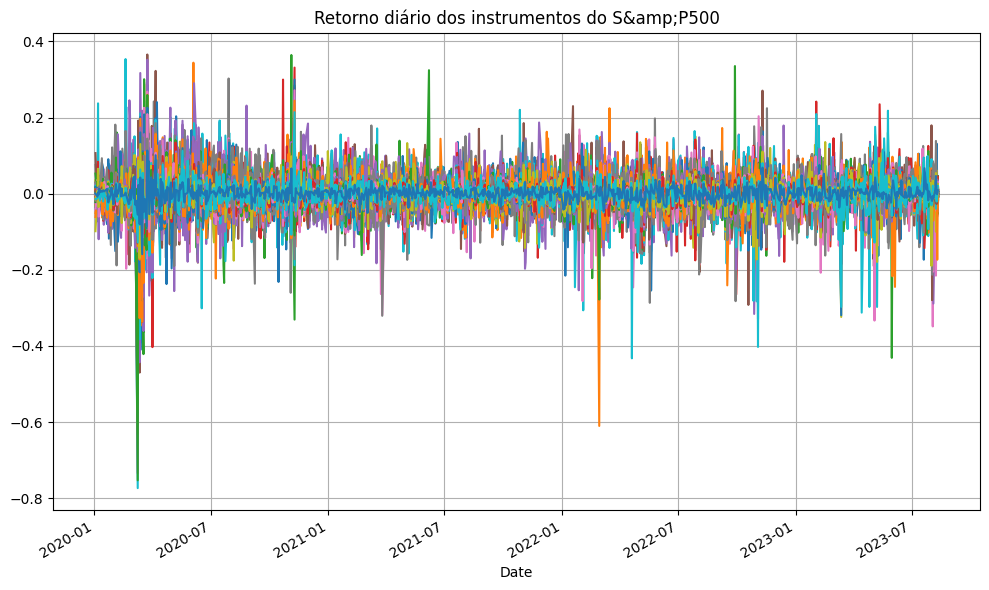

In [6]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Retorno diário dos instrumentos do S&amp;P500')
plt.tight_layout()
plt.savefig('tmp.png')
# Os valores que estão acima de zero são valores positivos

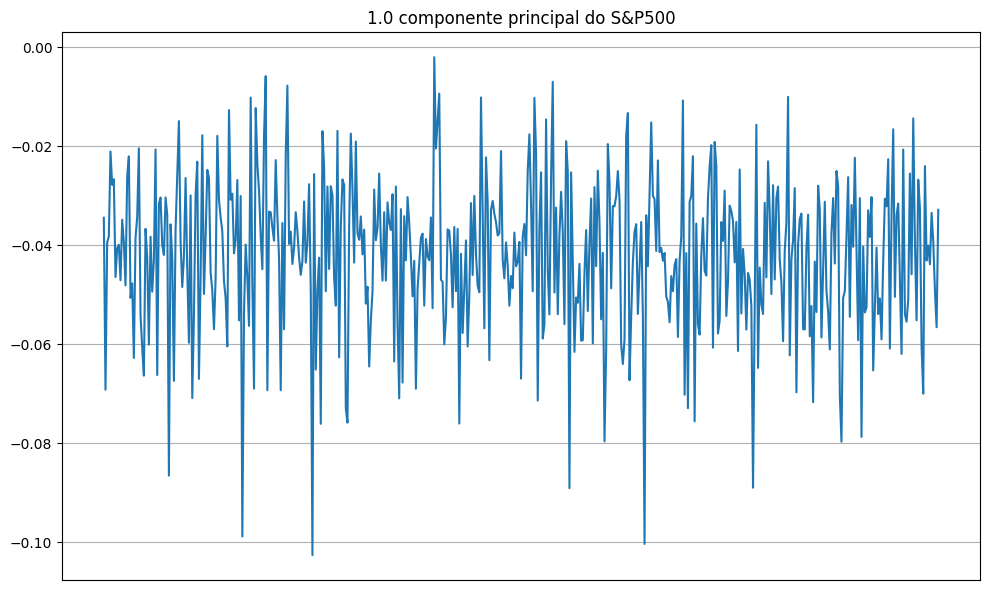

In [9]:
# Componete principal e como está sua variação ao longo do tempo
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='1.0 componente principal do S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

[*********************100%***********************]  1 of 1 completed


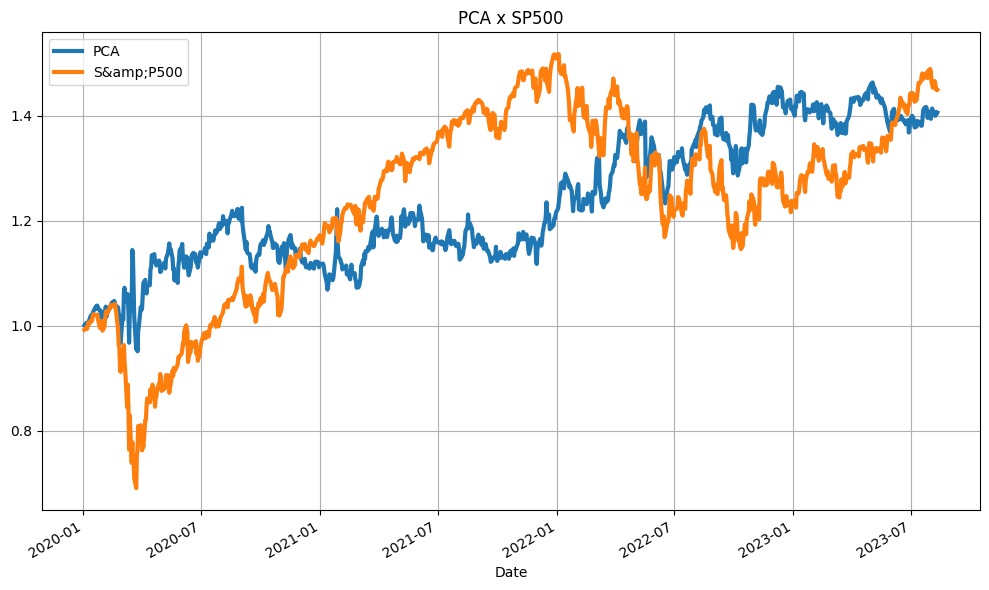

In [10]:
# Ativos que tiveram
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

indice = yf.download(['SPY'], start='2020-01-01')['Adj Close']

ws = [-1,]*10+[1,]*10
myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA x SP500')
indice['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA', 'S&amp;P500'])

plt.tight_layout()
plt.savefig('tmp.png')